In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
pr.isnull().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [6]:
pr.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10.9     128
        ... 
69.2       1
85.7       1
65         1
92.3       1
81.7       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [7]:
pr.poverty_rate.replace("-",0.0,inplace = True)

In [8]:
pr.poverty_rate.value_counts()

0       1464
0.0      201
6.7      129
7.4      129
10.9     128
        ... 
89         1
80.7       1
83.1       1
73.8       1
70.2       1
Name: poverty_rate, Length: 771, dtype: int64

In [9]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [10]:
pr["poverty_rate"] = pr.poverty_rate.astype("float")

In [11]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [12]:
pr.poverty_rate.value_counts()

0.0     1665
6.7      129
7.4      129
10.0     128
10.9     128
        ... 
56.3       1
44.5       1
76.3       1
77.2       1
62.2       1
Name: poverty_rate, Length: 770, dtype: int64

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

In [13]:
pr.groupby("Geographic Area").poverty_rate.mean().head()

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
Name: poverty_rate, dtype: float64

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

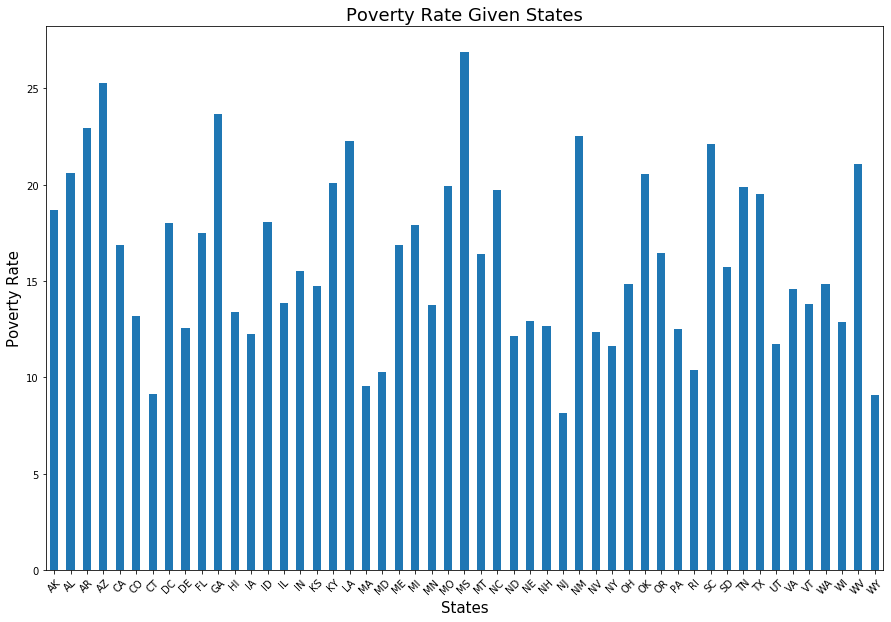

In [14]:
pr.groupby('Geographic Area').poverty_rate.mean().plot.bar(figsize = (15, 10))
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

In [15]:
pr.groupby('Geographic Area').poverty_rate.mean().sort_values(ascending = False).head()

Geographic Area
MS    26.884254
AZ    25.268071
GA    23.663636
AR    22.963216
NM    22.507675
Name: poverty_rate, dtype: float64

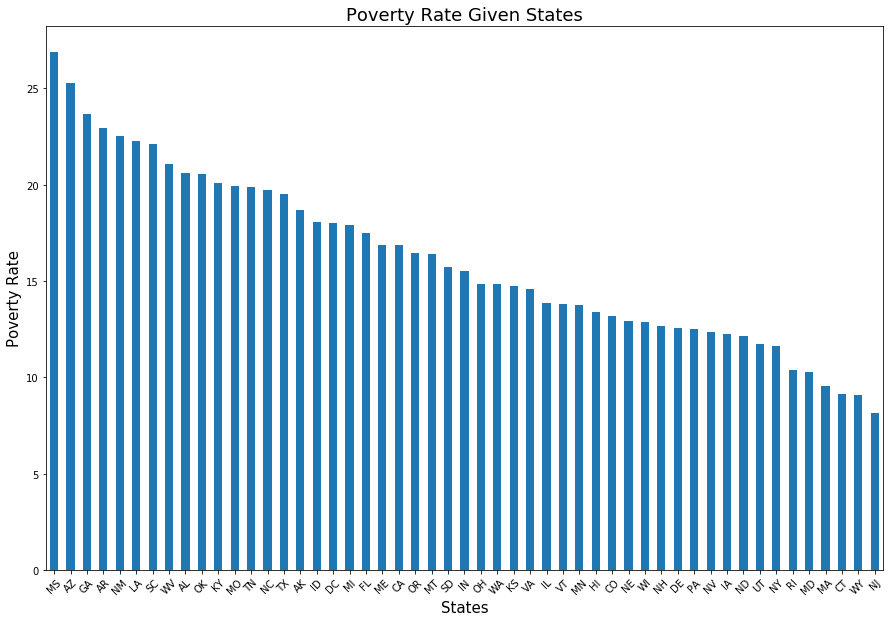

In [16]:
pr.groupby('Geographic Area').poverty_rate.mean().sort_values(ascending = False).plot.bar(figsize = (15, 10))
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

In [17]:
aa = pr.groupby('Geographic Area').poverty_rate.mean().sort_values(ascending = False).index
bb = pr.groupby('Geographic Area').poverty_rate.mean().sort_values(ascending = False).values
print(aa)
print(bb)

Index(['MS', 'AZ', 'GA', 'AR', 'NM', 'LA', 'SC', 'WV', 'AL', 'OK', 'KY', 'MO',
       'TN', 'NC', 'TX', 'AK', 'ID', 'DC', 'MI', 'FL', 'ME', 'CA', 'OR', 'MT',
       'SD', 'IN', 'OH', 'WA', 'KS', 'VA', 'IL', 'VT', 'MN', 'HI', 'CO', 'NE',
       'WI', 'NH', 'DE', 'PA', 'NV', 'IA', 'ND', 'UT', 'NY', 'RI', 'MD', 'MA',
       'CT', 'WY', 'NJ'],
      dtype='object', name='Geographic Area')
[26.88425414 25.26807095 23.66363636 22.96321627 22.50767494 22.29177215
 22.10555556 21.08222222 20.61179487 20.54589502 20.08       19.93068732
 19.8872093  19.72056834 19.4962221  18.67859155 18.07621145 18.
 17.90072254 17.50860566 16.89384615 16.88837057 16.43580902 16.42328767
 15.74526854 15.49985294 14.82666667 14.82599681 14.71904762 14.58583474
 13.84934211 13.78595041 13.74573643 13.40066225 13.18777293 12.91741379
 12.85868726 12.65979381 12.55584416 12.48717367 12.37099237 12.23154762
 12.1319202  11.72461538 11.63896321 10.36944444 10.27239382  9.54634146
  9.1375      9.06372549  8.16091743

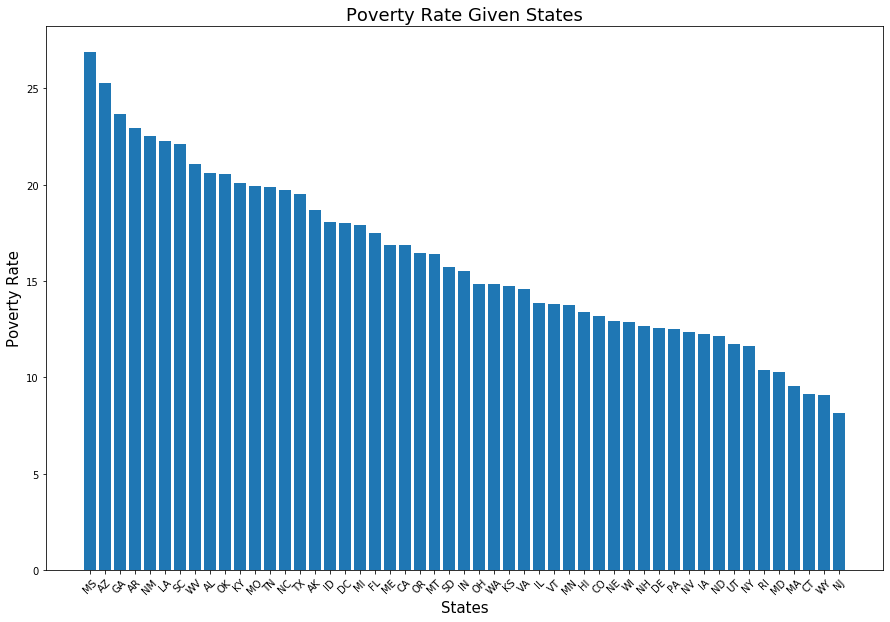

In [18]:
plt.figure(figsize=(15,10))
plt.bar(aa, bb)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

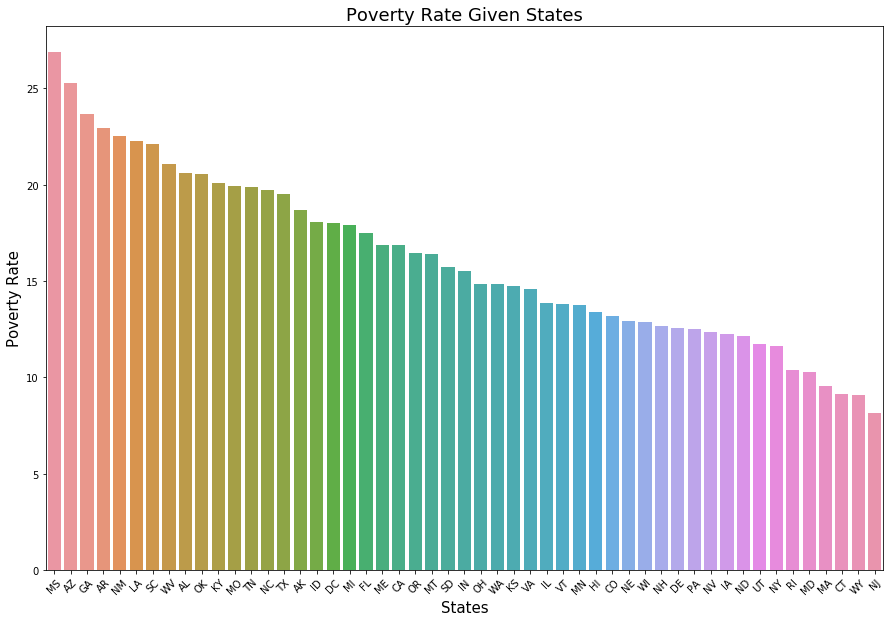

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(x="Geographic Area",y="poverty_rate", order = aa, ci=None, data=pr)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

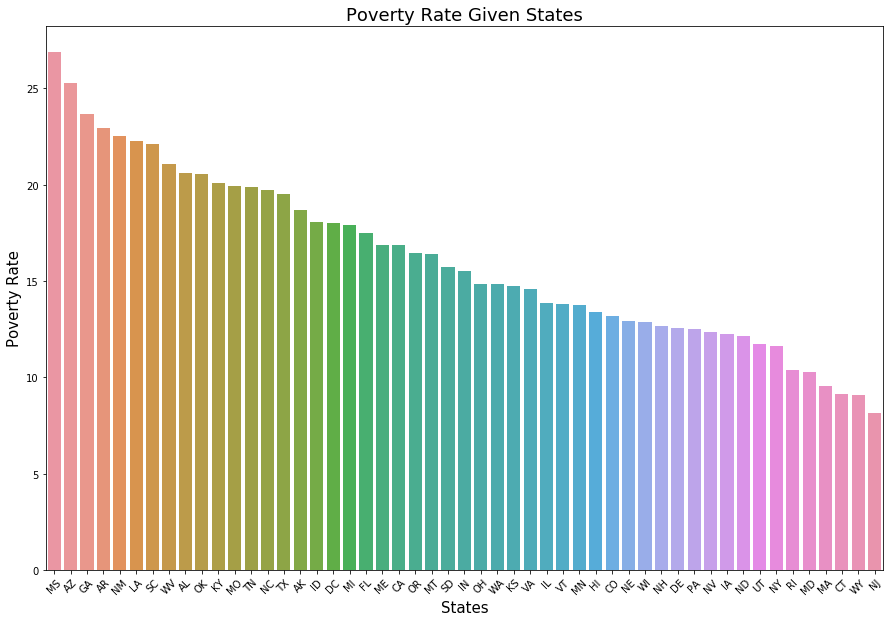

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(aa, bb)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

## 2. Most common 15 Name or Surname of killed people 

In [21]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [22]:
kill.name.value_counts()

TK TK                       49
Daquan Antonio Westbrook     2
Michael Brown                2
Michael Johnson              2
Eric Harris                  2
                            ..
Jorge Alberto Fuentes        1
Gino Paredes                 1
Jasen Scott Ramirez          1
Christopher Shell            1
Todd Brent Burroughs         1
Name: name, Length: 2481, dtype: int64

In [23]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [24]:
tot_list = [x for sublist in pairs for x in sublist]

In [25]:
len(tot_list)

5904

In [26]:
most_com = pd.Series(tot_list).value_counts().head(15)

In [27]:
most_com

Michael        91
David          57
James          57
Joseph         48
Robert         48
William        47
Daniel         46
John           42
Christopher    40
Lee            38
Smith          36
Richard        36
J.             32
Johnson        32
Anthony        32
dtype: int64

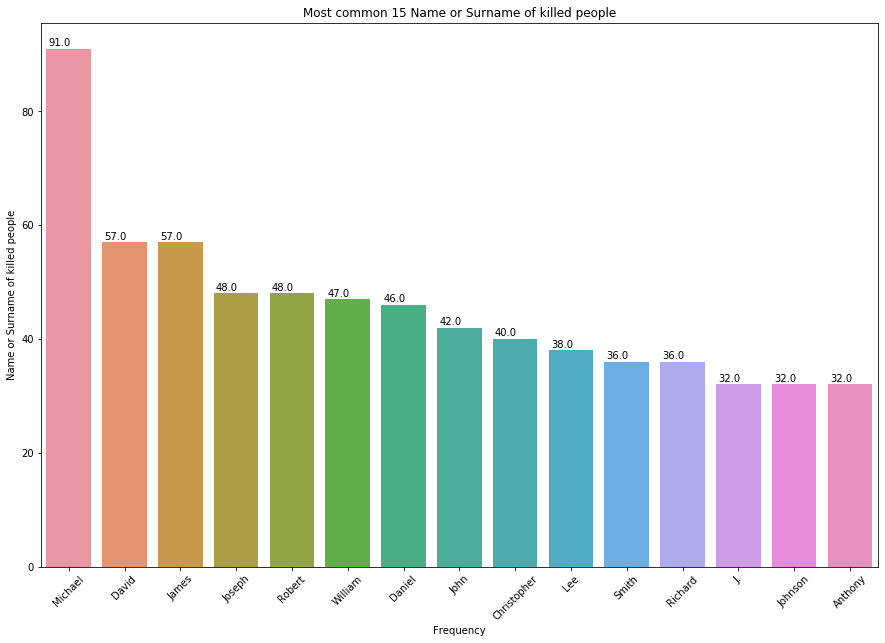

In [28]:
plt.figure(figsize=(15,10))
ax = sns.barplot(most_com.index, most_com.values)
plt.title("Most common 15 Name or Surname of killed people")
plt.xlabel("Frequency")
plt.ylabel("Name or Surname of killed people")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+0.5))

In [29]:
df = pd.DataFrame(pairs)
df['len'] = df['name'].apply(len)
two_names = df.name[df.len == 2]
three_names = df.name[df.len == 3]
four_names = df.name[df.len == 4]
a, b = zip(*two_names)
c, d, e = zip(*three_names)
f, g, h, j = zip(*four_names)
total_list = a+b+c+d+e+f+g+h+j
Counter(total_list)
name_count = Counter(total_list)
most_common_names = name_count.most_common(15)
x, y = zip(*most_common_names)

In [30]:
x, y = list(x), list(y)

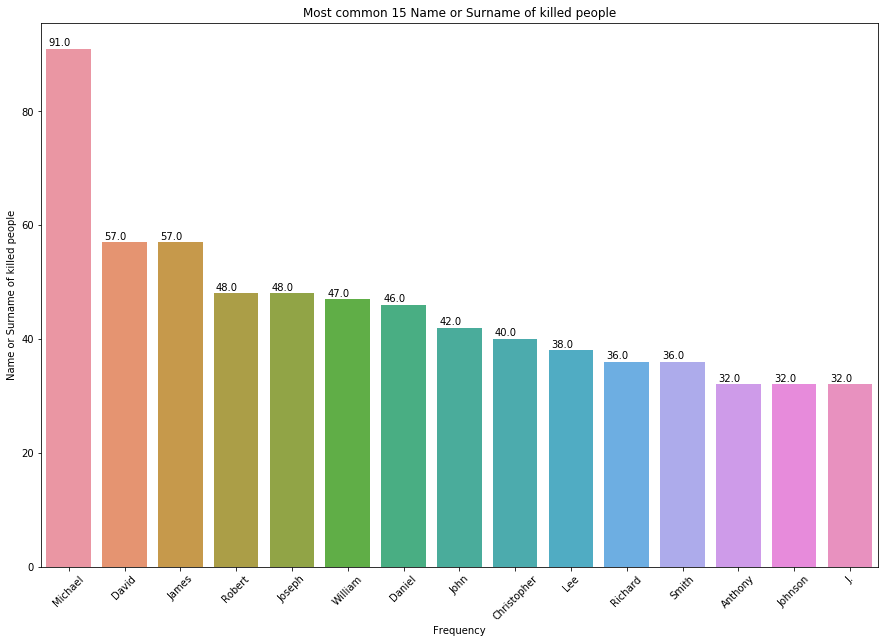

In [31]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x,y)
plt.title("Most common 15 Name or Surname of killed people")
plt.xlabel("Frequency")
plt.ylabel("Name or Surname of killed people")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+0.5))

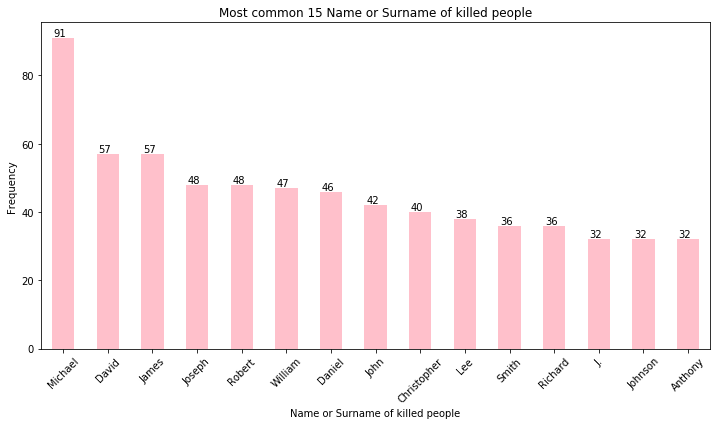

In [32]:
ax = most_com.plot.bar(figsize = (12,6), rot = 45, color = "pink")
ax.set_title("Most common 15 Name or Surname of killed people")
ax.set_xlabel("Name or Surname of killed people")
ax.set_ylabel("Frequency")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+0.5))

## 3. Killed People According to Races (Pie Chart)

In [33]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [34]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [35]:
kill.race.value_counts(dropna=True)

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [36]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [37]:
kill.dropna(inplace=True)

In [38]:
kill.race.isnull().sum()

0

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [39]:
kill.race.value_counts(normalize=True)

W    0.518190
B    0.262644
H    0.177906
A    0.015972
N    0.012866
O    0.012422
Name: race, dtype: float64

In [40]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [41]:
labels= kill.race.value_counts().index
sizes= kill.race.value_counts().values

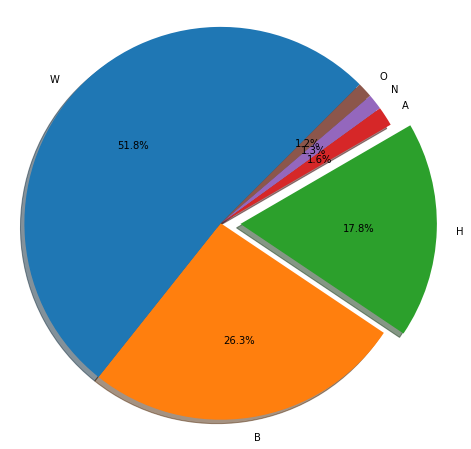

In [42]:
explode=(0,0,0.1,0,0,0)

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0.5, 1.0, 'Killed People According to Races')

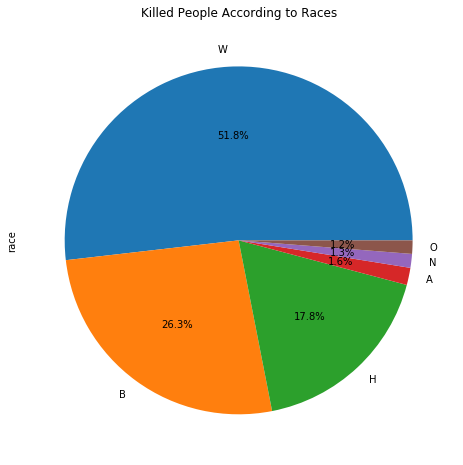

In [43]:
plt.figure(figsize=(8,8))
kill['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Killed People According to Races")

## 4a.Box plot of age in both genders separeted by manner of death.

In [44]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [45]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [73]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5, 1.0, 'manner of death')

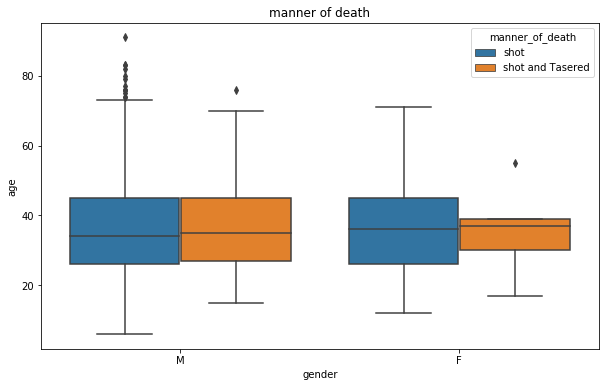

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x="gender", y="age", data=kill, hue = "manner_of_death")
plt.title("manner of death")

Text(0.5, 1.0, 'manner of death')

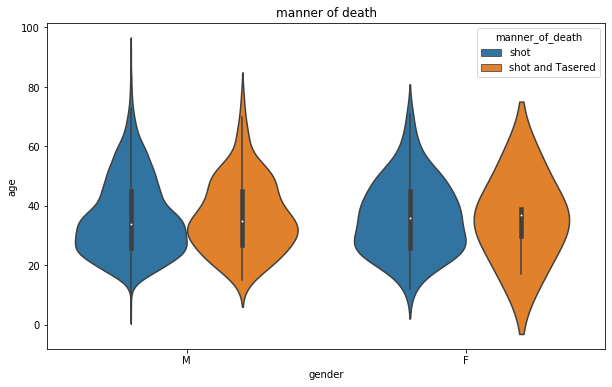

In [75]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x="gender", y="age", data=kill, hue = "manner_of_death")
ax.set_title("manner of death")

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

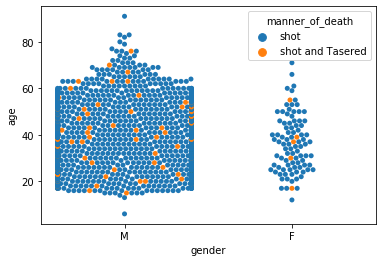

In [47]:
sns.swarmplot(x="gender",y="age", data=kill, hue="manner_of_death")

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

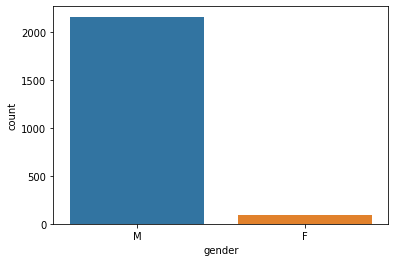

In [48]:
sns.countplot(x="gender", data=kill)

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [80]:
cc = kill.armed.value_counts().head(7).index

In [81]:
dd = kill.armed.value_counts().head(7).values

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

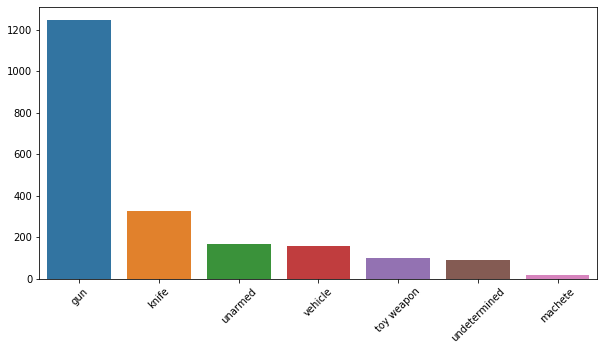

In [84]:
plt.figure(figsize=(10, 5))
sns.barplot(cc,dd)
plt.xticks(rotation=45)

In [49]:
wt=pd.DataFrame(kill.armed.value_counts().head(7)).reset_index()

In [50]:
wt

,index,armed
0,gun,1247
1,knife,324
2,unarmed,165
3,vehicle,158
4,toy weapon,102
5,undetermined,92
6,machete,16


In [51]:
wt.columns=["weapon type", "number of weapon"]

In [52]:
wt

,weapon type,number of weapon
0,gun,1247
1,knife,324
2,unarmed,165
3,vehicle,158
4,toy weapon,102
5,undetermined,92
6,machete,16


Text(0, 0.5, 'Number of Weapon')

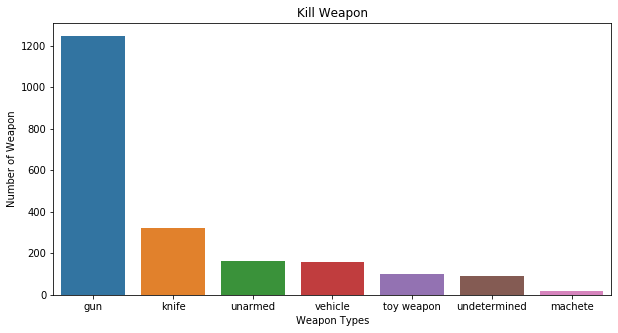

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="weapon type", y="number of weapon", data=wt)
ax.set_title("Kill Weapon")
ax.set_xlabel("Weapon Types")
ax.set_ylabel("Number of Weapon")

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [85]:
kill["age_cat"] = kill.age.apply(lambda x : "above25" if x >=25 else "below25")

In [86]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


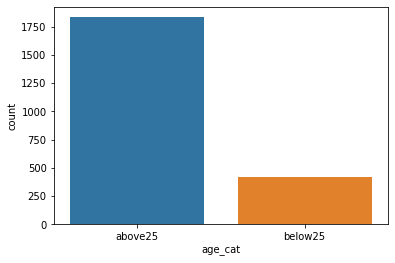

In [87]:
sns.countplot(x="age_cat",data=kill)

In [54]:
kp_age = pd.DataFrame(kill.groupby(kill["age"] < 25).age.count())
kp_age

,age
age,
False,1832
True,422


In [55]:
kp_age.columns = ["number"]

In [56]:
kp_age

,number
age,
False,1832
True,422


In [57]:
kp_age= kp_age.reset_index()

In [58]:
kp_age

,age,number
0,False,1832
1,True,422


[Text(0, 0, 'Above 25'), Text(0, 0, 'Below 25')]

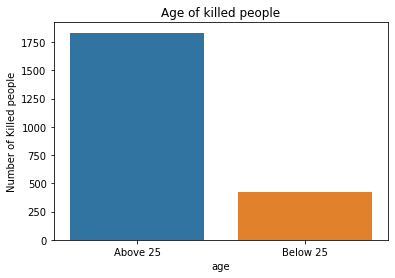

In [59]:
ax=sns.barplot(x="age", y="number", data=kp_age)
ax.set_title("Age of killed people")
ax.set_xlabel("age")
ax.set_ylabel("Number of Killed people")
#ax.set_xticks(x)
ax.set_xticklabels(["Above 25", "Below 25"])

**INSTRUCTION-4: Plot number of killed poeple by race**

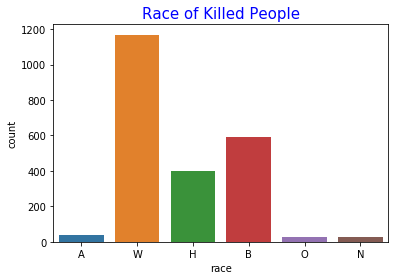

In [89]:
sns.countplot(x="race", data = kill)
plt.title("Race of Killed People",color='b',fontsize=15)

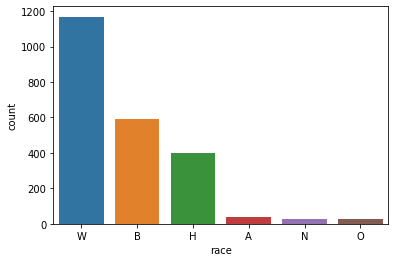

In [91]:
sns.countplot(x="race", order = kill.groupby("race").race.count().sort_values(ascending=False).index, data = kill)

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [97]:
ee = kill.city.value_counts()[:12].index

In [98]:
ff = kill.city.value_counts()[:12].values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

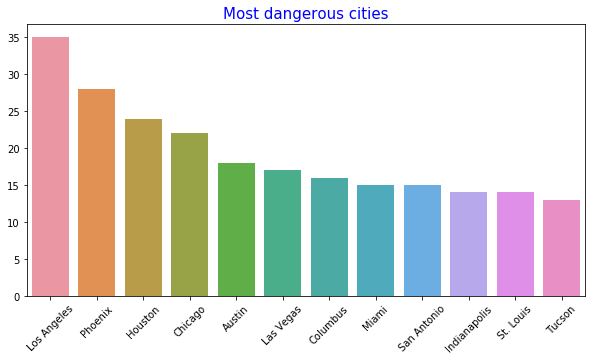

In [101]:
plt.figure(figsize=(10, 5))
sns.barplot(ee,ff)
plt.title("Most dangerous cities", color='b',fontsize=15)
plt.xticks(rotation=45)

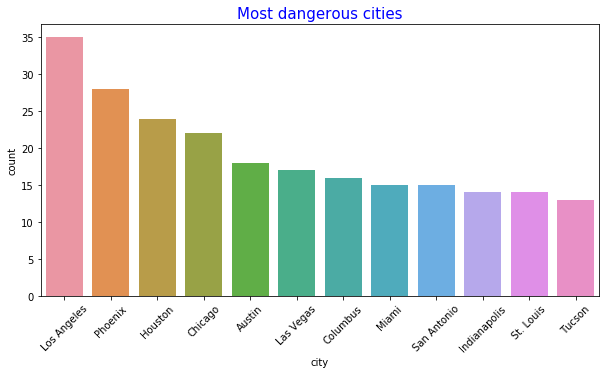

In [110]:
plt.figure(figsize=(10, 5))
sns.countplot(x="city", data=kill, order=kill.city.value_counts().head(12).index)
plt.title("Most dangerous cities", color='b',fontsize=15)
plt.xticks(rotation=45);

In [61]:
c = pd.DataFrame(kill.city.value_counts().head(12)).reset_index()

In [62]:
c.columns = ["city", "number"]

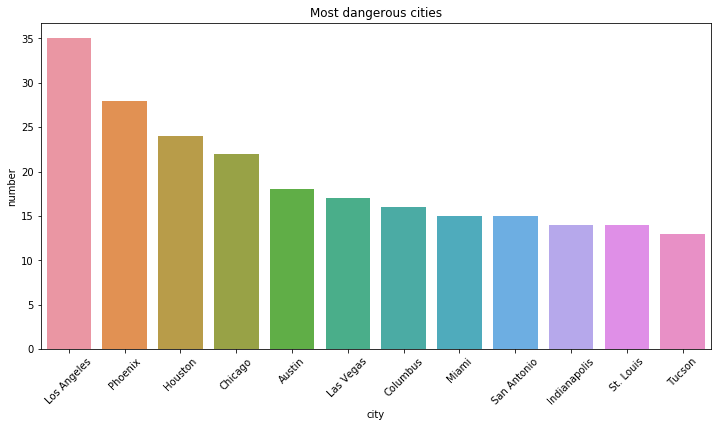

In [63]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="city", y="number", data=c)
ax.set_title("Most dangerous cities")
ax.set_xticklabels(c["city"], rotation=45);

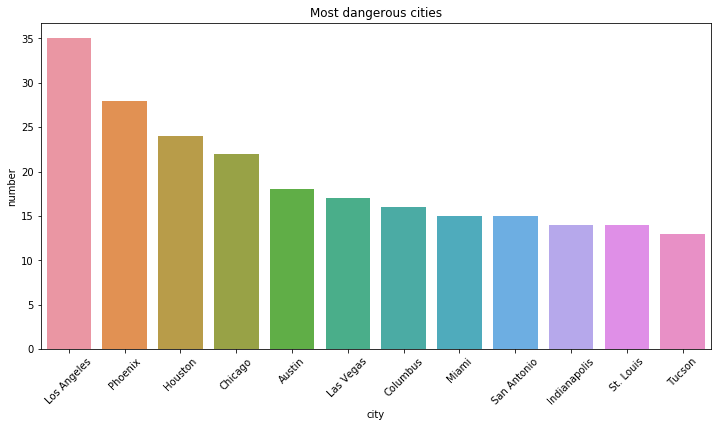

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="city", y="number", data=c)
ax.set_title("Most dangerous cities")
ax.set_xticklabels(c["city"], rotation=45);

**INSTRUCTION-6: Plot 20 most dangerous states**

In [105]:
gg = kill.state.value_counts()[:20].index
hh = kill.state.value_counts()[:20].values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

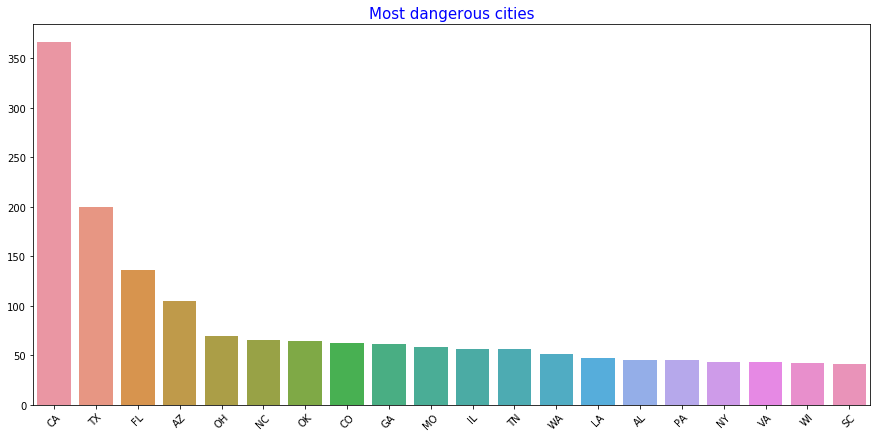

In [106]:
plt.figure(figsize=(15, 7))
sns.barplot(gg,hh)
plt.title("Most dangerous cities", color='b',fontsize=15)
plt.xticks(rotation=45)

In [65]:
s = pd.DataFrame(kill.state.value_counts().head(20)).reset_index()
s.columns = ["state","number"]

Text(0.5, 1.0, 'most dangerous state')

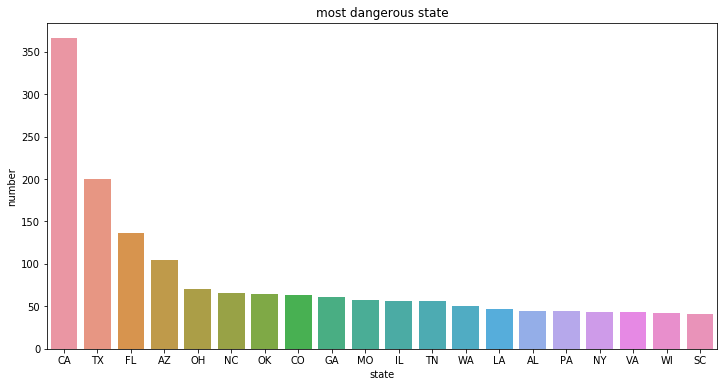

In [66]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="state",y="number",data=s)
ax.set_title("most dangerous state")

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

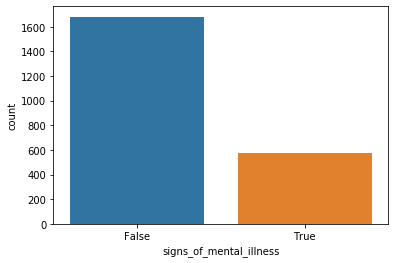

In [113]:
sns.countplot(kill.signs_of_mental_illness)

In [67]:
mi = pd.DataFrame(kill.signs_of_mental_illness.value_counts()).reset_index()
mi.columns = ["True-False", "Number"]

Text(0, 0.5, 'number of mental ilness')

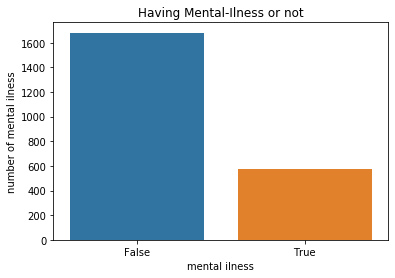

In [68]:
#plt.figure(figsize=(12,6))
ax = sns.barplot(x="True-False",y="Number",data=mi)
ax.set_title("Having Mental-Ilness or not")
ax.set_xlabel("mental ilness")
ax.set_ylabel("number of mental ilness")

**INSTRUCTION-8: Plot number of Threat Types**

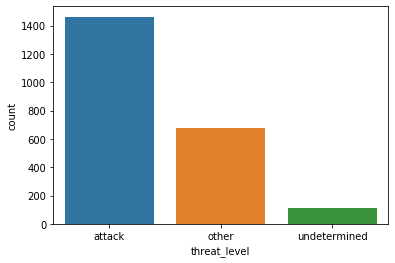

In [112]:
sns.countplot(x="threat_level", data=kill)

Text(0.5, 0, 'Threat Types')

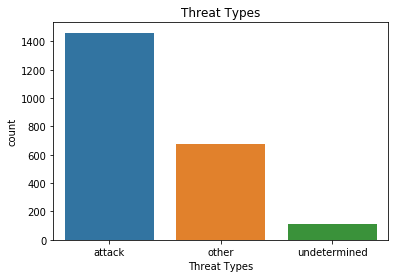

In [69]:
ax = sns.countplot(x="threat_level", data=kill)
ax.set_title("Threat Types")
ax.set_xlabel("Threat Types")

**INSTRUCTION-9: Plot number of Flee Types**

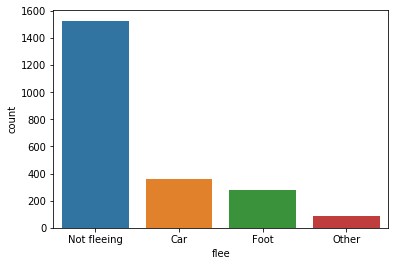

In [111]:
sns.countplot(x="flee", data=kill)

Text(0.5, 0, 'Flee Types')

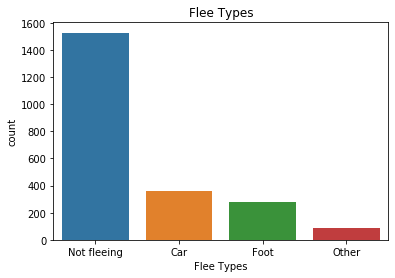

In [70]:
ax = sns.countplot(x="flee", data=kill)
ax.set_title("Flee Types")
ax.set_xlabel("Flee Types")